 ## Домашнее задание Проверка гипотез

<div class="alert alert-info">
<b>Задание № 1</b>
    
Разработайте функцию для проверки нормальности распределения выборки данных, используя шаблон ниже. Вы можете использовать один из известных Вам статистических тестов.
</div>

In [65]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
def check_normality(data):

    stat, p = stats.shapiro(data)
    
    if p < 0.05:
        print("Отклоняем нулевую гипотезу >> Данные распределены не нормально")
    else:
        print("Не отклоняем нулевую гипотезу >> Данные распределены нормально")

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин.
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
- Является ли результат полезным с практической точки зрения? Почему да или нет?
</div>

In [8]:
np.random.seed(42) #фиксация случайности

mens  = stats.norm.rvs(loc=171, scale=10, size=150000)  # Выборка мужчин со средним ростом 171
womens = stats.norm.rvs(loc=170, scale=10, size=150000)  # Выборка женщин со средним ростом 170

In [9]:
stat, p = stats.ttest_ind(mens, womens, equal_var = False)

if p < 0.001:
    print('Отклоняем нулевую гипотезу >> В выборках есть статистически значимые различия')
else:
    print('Принимаем нулевую гипотезу >> В выборках нет статистически значимых различий')

Отклоняем нулевую гипотезу >> В выборках есть статистически значимые различия


[]

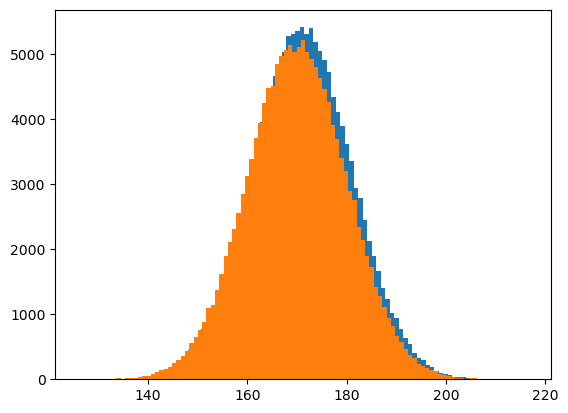

In [10]:
plt.hist(mens, bins = 100)
plt.hist(womens, bins = 100)
plt.plot()

<p>Наблюдение за возрастом мужчин и женщин на достаточно большой выборке (15000) показал, что различия между ними есть. Также отклонение нулевой гипотезы означает, что между ними есть взаимосвязь.</p>
<p>Т.о., с практической точки зрения наблюдение является полезным. Между ростом мужчин и женщин есть взаимосвязь. Можно оценивать взаимное влияние.</p>

<i>Принцип нулевой гипотезы является фундаментальной концепцией при статистической проверке гипотез. Он включает в себя предположение о совокупном параметре или отсутствии эффекта или взаимосвязи между переменными.</i>

<i>По сути, нулевая гипотеза (H0) предполагает, что между переменными нет существенной разницы, эффекта или взаимосвязи. Она служит отправной точкой или предположением по умолчанию о том, что между группами или условиями нет реальных изменений, эффекта или разницы.</i>

<i>Нулевая гипотеза обычно формулируется для проверки на альтернативную гипотезу (H1 или Hαα), которая предполагает, что в популяции присутствует эффект, различие или взаимосвязь.</i>

<div class="alert alert-info">
<b>Задание № 3</b>

Специалист по кадрам, работающий в технологической компании, интересуется сверхурочным временем разных команд. Чтобы выяснить, есть ли разница между сверхурочной работой команды разработчиков программного обеспечения и группы тестирования, она случайным образом выбрала 17 сотрудников в каждой из двух команд и записала их среднее сверхурочное время за неделю в пересчете на час. Данные ниже.

В соответствии с этой информацией проведите проверку гипотезы, чтобы проверить, есть ли разница между переутомлением двух команд, используя уровень значимости 0,05. Прежде чем приступать к проверке гипотез, проверьте предположение нормальности.
</div>

In [14]:
test_team = [6.2, 7.1, 1.5, 2,3 , 2, 1.5, 6.1, 2.4, 2.3, 12.4, 1.8, 5.3, 3.1, 9.4, 2.3, 4.1]
developer_team = [2.3, 2.1, 1.4, 2.0, 8.7, 2.2, 3.1, 4.2, 3.6, 2.5, 3.1, 6.2, 12.1, 3.9, 2.2, 1.2 ,3.4]

In [15]:
check_normality(test_team)
check_normality(developer_team)

Отклоняем нулевую гипотезу >> Данные распределены не нормально
Отклоняем нулевую гипотезу >> Данные распределены не нормально


Т.к. распределения не нормальные, применяем не параметрические тесты:

In [17]:
stat, p = stats.mannwhitneyu(test_team, developer_team)

if p < 0.05:
    print('Отклоняем нулевую гипотезу >> Переутомляемость двух команд связана между собой')
else:
    print('Принимаем нулевую гипотезу >> Переутомляемость двух команд не связана')

Принимаем нулевую гипотезу >> Переутомляемость двух команд не связана


<div class="alert alert-info">
<b>Задание № 4</b>

Педиатр хочет увидеть влияние потребления смеси на среднемесячную прибавку в весе у новорожденных. По этой причине она собрала данные из трех разных групп. Первая группа – дети исключительно грудного вскармливания, вторая группа – дети, которых кормят только смесью, и последняя группа – это дети, находящиеся на искусственном вскармливании и на грудном вскармливании. Эти данные приведены ниже.

В соответствии с этой информацией проведите проверку гипотезы, чтобы проверить, есть ли разница между среднемесячным приростом этих трех групп, используя уровень значимости 0,05. Если есть значительная разница, выполните дальнейший анализ, чтобы найти причину разницы.
</div>

In [19]:
only_breast = [794.1, 716.9, 993. , 724.7, 760.9, 908.2, 659.3 , 690.8, 768.7, 717.3 , 630.7, 729.5, 714.1, 810.3, 583.5, 679.9, 865.1];
only_formula = [898.8, 881.2, 940.2, 966.2, 957.5, 1061.7, 1046.2, 980.4, 895.6, 919.7, 1074.1, 952.5, 796.3, 859.6, 871.1 , 1047.5, 919.1 , 1160.5, 996.9];
both = [976.4, 656.4, 861.2, 706.8, 718.5, 717.1, 759.8, 894.6, 867.6, 805.6, 765.4, 800.3, 789.9, 875.3, 740. , 799.4, 790.3, 795.2 , 823.6, 818.7, 926.8, 791.7, 948.3];

1. Проверим нормальные ли распределения:

In [21]:
check_normality(only_breast)
check_normality(only_formula)
check_normality(both)

Не отклоняем нулевую гипотезу >> Данные распределены нормально
Не отклоняем нулевую гипотезу >> Данные распределены нормально
Не отклоняем нулевую гипотезу >> Данные распределены нормально


2. Проверим выборки на равенства дисперсий:

In [23]:
stat, p = stats.levene(only_breast, only_formula, both)
if p < 0.05:
    print('Дисперсии хотя бы двух выборок отличаются значительно')
else:
    print('Дисперсии всех выборок примерно одинаковы')

Дисперсии всех выборок примерно одинаковы


Т.к. данные в выборках распределены нормально и диспрерсии примерно одинаковы, то можно применить тест ANOVA для сравнения среднего прироста веса.

In [129]:
df = pd.DataFrame([only_breast, only_formula, both], index = ['only_breast', 'only_formula', 'both']).T
df_melt = pd.melt(df.reset_index(), id_vars = ['index'], value_vars = ['only_breast', 'only_formula', 'both']).dropna()
df_melt.columns = ['Ordinal_pos', 'Feeding_Type', 'Weight']
df_melt.head()

,Ordinal_pos,Feeding_Type,Weight
0,0,only_breast,794.1
1,1,only_breast,716.9
2,2,only_breast,993.0
3,3,only_breast,724.7
4,4,only_breast,760.9


[]

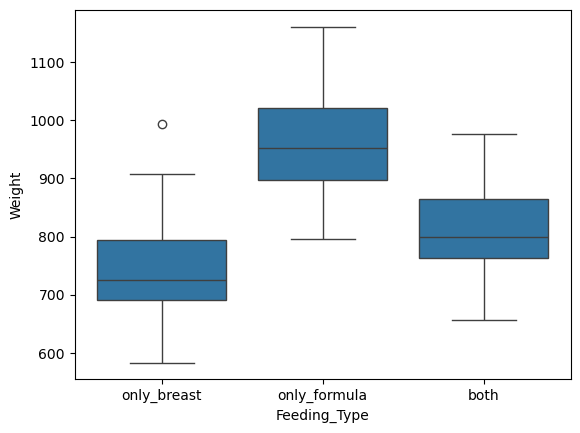

In [131]:
sns.boxplot(data = df_melt, x = 'Feeding_Type', y = 'Weight')
plt.plot()

Из графиков видно, что средние значения отличаются в зависимости от типов кормления.

In [133]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [135]:
model = ols(formula = 'Weight ~ C(Feeding_Type)', data = df_melt).fit()
aov_table = sm.stats.anova_lm(model, typ = 2)
print(aov_table)

                        sum_sq    df          F        PR(>F)
C(Feeding_Type)  429013.775232   2.0  26.701252  7.186236e-09
Residual         449880.993243  56.0        NaN           NaN


Т.к. <i>p_value</i> значимо и очень мало (меньше 0.05), можно сделать вывод, что способ кормления влияет на вес и средний вес различается между группами.

С помощью теста Тьюки выясним, между какими группами существуют различия в среднем весе:

In [153]:
import statsmodels.stats.multicomp as multi

In [163]:
variables = df_melt['Weight'].to_list()
groups = df_melt['Feeding_Type'].to_list()
results = multi.pairwise_tukeyhsd(endog = variables, groups = groups, alpha = 0.05)
print(results)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
   group1      group2    meandiff p-adj    lower    upper   reject
------------------------------------------------------------------
       both  only_breast -60.1286 0.0995 -129.1485   8.8912  False
       both only_formula 149.2636    0.0   82.3651 216.1621   True
only_breast only_formula 209.3923    0.0  137.3508 281.4337   True
------------------------------------------------------------------


<tr>Из результата видно, что разница в весе наблюдается между следующими группами:
<li>между вскармливаемыми смесью и находящимися на смешанном вскармливании;</li>
<li>между вскармливаемыми смесью и на грудном вскармливании;</li>
</tr>
Между группами детей, которые вскармливались грудью и находящимися на смешанном вскармливании разницы в среднем весе не было выявлено.

<div class="alert alert-info">
<b>Задание № 5 (Опционально) </b>

Аналитик финансовой инвестиционной компании интересуется взаимосвязью между полом и склонностью к риску. Из базы данных была взята случайная выборка из 660 клиентов. Клиенты в выборке были классифицированы в соответствии с их полом и склонностью к риску. Результат приведен в следующей таблице.
    
Проверьте гипотезу о том, что склонность к риску клиентов этой компании не зависит от их пола. Используйте α = 0.01.    
</div>

In [29]:
contingency_table = pd.DataFrame(
    [
        [53, 23, 30, 36, 88],
        [71, 48, 51, 57, 203]
    ],
    #columns = ['Machine Learning', 'Data Science', 'Analytics'],
    index = ['Ж', 'М'])

print('Уровень риска')
print(contingency_table)

Уровень риска
    0   1   2   3    4
Ж  53  23  30  36   88
М  71  48  51  57  203


In [30]:
stat, p, dof, exp = stats.chi2_contingency(contingency_table.values)
if p < 0.01:
    print('Отклоняем нулевую гипотезу >> Показатели риска зависят от пола')
else:
    print('Принимаем нулевую гипотезу >> Показатели риска не зависят от пола')

Принимаем нулевую гипотезу >> Показатели риска не зависят от пола


<div class="alert alert-info">
<b>Задание № 6 (Опционально)</b>

Компания электронной коммерции регулярно размещает рекламу своих кампаний на YouTube, Instagram и Facebook. Однако новому менеджеру было любопытно, есть ли разница между количеством клиентов, привлеченных этими платформами. Поэтому она начала использовать Adjust — приложение, позволяющее узнать, откуда приходят ваши пользователи. Ежедневные цифры, сообщаемые Adjust для каждой платформы, приведены ниже.
    
В соответствии с этой информацией проведите проверку гипотез, чтобы проверить, есть ли разница между средним числом привлеченных клиентов на этих трех платформах с использованием уровня значимости 0,05. Если есть значительная разница, выполните дальнейший анализ, чтобы найти причину разницы. Прежде чем приступать к проверке гипотез, проверьте соответствующие предположения.
</div>

In [32]:
youtube=[1913, 1879, 1939, 2146, 2040, 2127, 2122, 2156, 2036, 1974, 1956, 2146, 2151, 1943, 2125]
instagram = [2305., 2355., 2203., 2231., 2185., 2420., 2386., 2410., 2340., 2349., 2241., 2396., 2244., 2267., 2281.]
facebook = [2133., 2522., 2124., 2551., 2293., 2367., 2460., 2311., 2178., 2113., 2048., 2443., 2265., 2095., 2528.]

1. Проверим, существуют ли между группами статистически значимые различия:

In [185]:
h_statistic, p = stats.kruskal(youtube, instagram, facebook)
if p < 0.05:
    print('Между группами существуют статистически значимые различия')
else:
    print('Между группами отсутствуют статистически значимые различия')

Между группами существуют статистически значимые различия


2. Выясним, между какими конкретно группами могут быть различия:

In [196]:
import scikit_posthocs as sp

In [206]:
data = [youtube, instagram, facebook]
sp.posthoc_dunn(a = data, p_adjust = 'bonferroni')

,1,2,3
1,1.000000,0.000041,0.000553
2,0.000041,1.000000,1.000000
3,0.000553,1.000000,1.000000


Из матрицы <i>p_values</i> видно, что разница есть между 1 и 2 группами и между 1 и 3 группами.<br/>
Т.е. междн youtube и instagram, youtube и facebook есть статистически значимия разница между средним числом привлеченных клиентов. От привлеченных через youtube клиентов зависит число клиентов, привлеченных через instagram и facebook.<br/>
Количество клиентов, привлеченных через instagram никак не влияет на привлечение через facebook.